In [Bertoldi,1989](https://ui.adsabs.harvard.edu/abs/1989ApJ...346..735B/abstract) we find this Figure

![Fig1](https://private-user-images.githubusercontent.com/161264/303747374-0f9399ae-b415-430e-a2ed-db6a7a5b32aa.jpg?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MDc3NjEwMzksIm5iZiI6MTcwNzc2MDczOSwicGF0aCI6Ii8xNjEyNjQvMzAzNzQ3Mzc0LTBmOTM5OWFlLWI0MTUtNDMwZS1hMmVkLWRiNmE3YTViMzJhYS5qcGc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjQwMjEyJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI0MDIxMlQxNzU4NTlaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT02ZjU0NjEwZTVhZDBkNWE5YTkyMzcxYWM2NWVmNTdmNzZkYWJjMGY0N2Y2NWNjYjllY2Y4ZGJmOGFlYTZmYzJmJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCZhY3Rvcl9pZD0wJmtleV9pZD0wJnJlcG9faWQ9MCJ9.uhvjcuoj703lb39zPp4SlsfKb0HligtJLW6ZY4ZbPUk)

And we want to estimate teh initial parameters, first we make a calculation of $\eta$ and $\Gamma$ but with the actual parameters on the observations.

# $\eta$

![eta](https://github.com/will-henney/globule-seminario/assets/161264/9c069424-2226-4b87-b165-f864899f584a)

For $r_0$ we make a histogram of HST image and only we considerer 3 radius:
* $r_{min}=0.08$ arcsec
* $r_{mean}=0.14$ arcsec
* $r_{max}=0.22$ arcsec

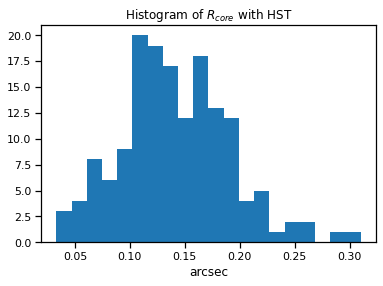

For the density we use the VEM and we have that
$$n_0=\sqrt{\frac{VEM}{\pi\xi_0 r_0^3}}$$ and we obtain 3 $n_0$.

For the JWST image we find 
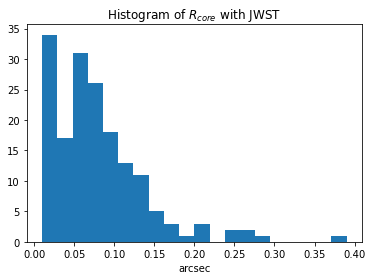

$\Rightarrow$
* $r_{min}=0.04$ arcsec
* $r_{mean}=0.09$ arcsec
* $r_{max}=0.15$ arcsec
and for the densities we use the VEM again.

## Radius and densities

In [1]:
'''HST image'''

import numpy as np
from astropy import units as u
from astropy import constants as cte

HST = np.array([0.08,.14,.22])*u.arcsec
VEM = 1.5969046e56/(u.cm**3)
xi_0 = 0.229182
D = 5429*u.pc

r_HST = (((HST*D).value)*u.AU).to('cm')
n_HST = np.sqrt(VEM/(np.pi*xi_0*r_HST**3))
print(rf'the radius are {r_HST} and the densities are {n_HST}')

the radius are [6.49733472e+15 1.13703358e+16 1.78676705e+16] cm and the densities are [28436.19187783 12283.28031714  6235.515962  ] 1 / cm3


In [2]:
'''JWST image'''

JWST = np.array([.04,.09,.15])

r_JWST = (((JWST*D).value)*u.AU).to('cm')
n_JWST = np.sqrt(VEM/(np.pi*xi_0*r_JWST**3))
print(rf'the radius are {r_JWST} and the densities are {n_JWST}')

the radius are [3.24866736e+15 7.30950156e+15 1.21825026e+16] cm and the densities are [80429.69643175 23831.02116496 11075.6577714 ] 1 / cm3


# $\eta$

$r_0$ is normalized in pc and $n_0$ in $cm^{-3}$ so we have 

In [4]:
eta_HST = 702*((r_HST).to('pc')).value*n_HST.value
np.log10(eta_HST)

array([4.62359324, 4.50207422, 4.4039269 ])

In [5]:
eta_JWST = 702*((r_JWST).to('pc')).value*n_JWST.value
np.log10(eta_JWST)

array([4.77410824, 4.59801698, 4.48709261])

## $\Gamma$

![gamma](https://github.com/will-henney/globule-seminario/assets/161264/6cce01a7-99ad-4abb-8e38-ae38adcf53ec)

first we estimate $$F = \frac{S}{4\pi R_0^2}$$ where $S$ is the Lymann continuum and $R_0$ is teh separation for the globule to the star.

On the image we consider only 3 distances
* 2.9841 arcsec
* 16.4769 arcsec
* 35.0963 arcsec

For this calculations we only consider $r_{mean}$ and $n_{mean}$ 

In [10]:
'''HST image'''

R = np.array([2.9841,16.4769,35.0963])*u.arcsec
R_0 = (((R*D).value)*u.AU).to('cm')
d = R_0.to('pc')

print(rf'the distance are {d}')

L = 10**49.1/u.second
F = L/(4*np.pi*R_0**2)

Gamma = F/(n_HST[1]*(cte.c).cgs)
np.log10(Gamma)

the distance are [0.07854311 0.43368082 0.92375338] pc


<Quantity [-1.33426218, -2.81838645, -3.4751581 ]>

In [11]:
'''JWST image'''

Gamma = F/(n_JWST[1]*(cte.c).cgs)
np.log10(Gamma)

<Quantity [-1.62209047, -3.10621474, -3.76298639]>

In [19]:
from IPython .display import IFrame
IFrame('Bertoldi_1.pdf',width=600,height=300)

With the actual parameters we ares onthe green zone